## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Climate & Environment/Rain in Australia.csv')
data=data.sample(n=1000)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
105886,2009-11-21,Woomera,19.0,21.1,16.4,10.6,0.2,W,89.0,E,...,96.0,95.0,1008.4,1004.8,8.0,8.0,20.3,20.4,Yes,Yes
25332,2012-04-19,Penrith,17.6,25.6,43.8,NaN,NaN,ESE,28.0,SSE,...,100.0,62.0,NaN,NaN,NaN,NaN,19.3,25.0,Yes,Yes
105421,2017-02-05,Nuriootpa,19.9,23.9,1.6,4.4,0.0,WNW,43.0,NW,...,69.0,91.0,1008.9,1008.4,8.0,NaN,23.9,22.1,Yes,Yes
54393,2015-07-18,MountGinini,-5.1,-0.1,0.0,NaN,NaN,S,43.0,ESE,...,98.0,96.0,NaN,NaN,NaN,NaN,-3.3,-1.3,No,No
65562,2012-11-02,MelbourneAirport,8.4,15.0,0.6,4.6,1.6,SSW,35.0,S,...,79.0,60.0,1019.0,1019.1,7.0,7.0,10.8,14.5,No,No


### Create GReaT Model

In [6]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_rainaustralia", # Name of the directory where all intermediate steps are saved
              batch_size=32                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [7]:
trainer = great.fit(data)

2024-06-30 20:06:24,452 - INFO - Convert data into HuggingFace dataset object... (great.py:190)
2024-06-30 20:06:24,475 - INFO - Create GReaT Trainer... (great.py:195)
2024-06-30 20:06:24,833 - INFO - Start training... (great.py:211)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,1.150000
200,0.869200
300,0.841400


In [8]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 176.2553,
 'train_samples_per_second': 56.736,
 'train_steps_per_second': 1.816,
 'total_flos': 962114006016000.0,
 'train_loss': 0.9460446000099182,
 'epoch': 10.0,
 'step': 320}

In [9]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

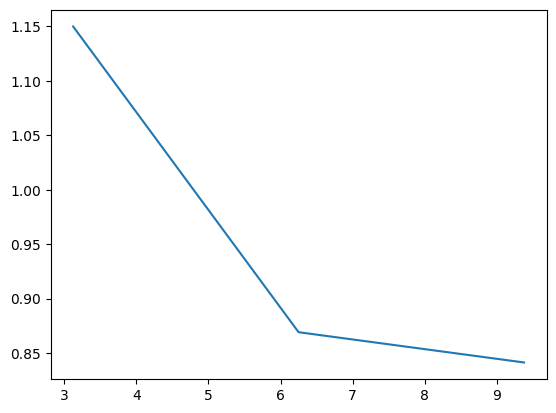

In [10]:
plt.plot(epochs, loss)

### Generate Samples

In [11]:
n_samples = 1000

In [12]:
samples = great.sample(n_samples, k=50, max_length=200)

  0%|          | 0/1000 [00:00<?, ?it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

  0%|          | 4/1000 [00:03<12:37,  1.31it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,',

  1%|          | 11/1000 [00:05<08:25,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'R

  1%|▏         | 14/1000 [00:08<10:45,  1.53it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,',

  2%|▏         | 17/1000 [00:11<12:20,  1.33it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'R

  2%|▏         | 21/1000 [00:14<12:09,  1.34it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainT

  2%|▏         | 23/1000 [00:17<14:19,  1.14it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

  3%|▎         | 27/1000 [00:20<13:31,  1.20it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,'

  3%|▎         | 32/1000 [00:23<12:00,  1.34it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

  4%|▎         | 37/1000 [00:26<10:58,  1.46it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

  4%|▍         | 44/1000 [00:29<09:05,  1.75it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'R

  5%|▌         | 51/1000 [00:32<08:04,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rain

  6%|▌         | 59/1000 [00:35<07:06,  2.21it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 

  6%|▋         | 65/1000 [00:38<07:10,  2.17it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,'

  7%|▋         | 70/1000 [00:41<07:42,  2.01it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

  7%|▋         | 73/1000 [00:43<08:56,  1.73it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'Rai

  8%|▊         | 78/1000 [00:46<08:53,  1.73it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,'

  8%|▊         | 84/1000 [00:49<08:17,  1.84it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,',

  9%|▉         | 89/1000 [00:52<08:20,  1.82it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

  9%|▉         | 94/1000 [00:55<08:29,  1.78it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 10%|█         | 105/1000 [00:58<06:17,  2.37it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 11%|█         | 111/1000 [01:01<06:23,  2.32it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 12%|█▏        | 121/1000 [01:03<05:29,  2.66it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'Ra

 12%|█▏        | 123/1000 [01:06<07:02,  2.08it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 13%|█▎        | 132/1000 [01:09<06:00,  2.41it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No

 14%|█▍        | 142/1000 [01:12<05:15,  2.72it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,',

 15%|█▍        | 148/1000 [01:15<05:36,  2.53it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', '

 16%|█▌        | 155/1000 [01:18<05:40,  2.48it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 16%|█▌        | 162/1000 [01:21<05:42,  2.45it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rain

 17%|█▋        | 168/1000 [01:24<05:57,  2.33it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 17%|█▋        | 174/1000 [01:27<06:02,  2.28it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is 

 18%|█▊        | 179/1000 [01:30<06:30,  2.10it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is 

 18%|█▊        | 184/1000 [01:32<06:52,  1.98it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Y

 19%|█▉        | 194/1000 [01:35<05:31,  2.43it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rai

 20%|█▉        | 199/1000 [01:38<06:03,  2.20it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No

 20%|██        | 204/1000 [01:41<06:27,  2.06it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 

 21%|██        | 211/1000 [01:44<06:01,  2.18it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 21%|██▏       | 214/1000 [01:47<07:06,  1.84it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

 22%|██▏       | 220/1000 [01:50<06:48,  1.91it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No

 23%|██▎       | 229/1000 [01:53<05:40,  2.27it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', '

 24%|██▎       | 236/1000 [01:56<05:32,  2.30it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', '

 24%|██▍       | 244/1000 [01:59<05:10,  2.43it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 25%|██▌       | 252/1000 [02:02<04:57,  2.52it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 26%|██▌       | 258/1000 [02:04<05:09,  2.40it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is 

 26%|██▋       | 264/1000 [02:07<05:24,  2.26it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,',

 27%|██▋       | 270/1000 [02:10<05:31,  2.20it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 28%|██▊       | 276/1000 [02:13<05:32,  2.18it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rai

 28%|██▊       | 278/1000 [02:16<07:00,  1.72it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 29%|██▉       | 288/1000 [02:19<05:16,  2.25it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rai

 30%|██▉       | 296/1000 [02:22<04:50,  2.42it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 30%|███       | 302/1000 [02:25<05:03,  2.30it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,

 31%|███       | 309/1000 [02:28<04:53,  2.35it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 31%|███▏      | 314/1000 [02:30<05:12,  2.20it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 32%|███▏      | 320/1000 [02:33<05:17,  2.14it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', '

 33%|███▎      | 326/1000 [02:36<05:16,  2.13it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is N

 34%|███▎      | 336/1000 [02:39<04:19,  2.56it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,

 34%|███▍      | 339/1000 [02:42<05:15,  2.09it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rain

 35%|███▍      | 346/1000 [02:45<05:04,  2.15it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 35%|███▌      | 350/1000 [02:48<05:37,  1.93it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Ye

 36%|███▌      | 356/1000 [02:51<05:30,  1.95it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 36%|███▌      | 362/1000 [02:54<05:21,  1.98it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,

 37%|███▋      | 369/1000 [02:56<04:53,  2.15it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,

 38%|███▊      | 375/1000 [02:59<04:58,  2.10it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 38%|███▊      | 382/1000 [03:02<04:39,  2.21it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 39%|███▊      | 386/1000 [03:05<05:10,  1.98it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'R

 39%|███▉      | 389/1000 [03:08<06:02,  1.69it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,',

 40%|███▉      | 397/1000 [03:11<04:57,  2.03it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 40%|████      | 401/1000 [03:14<05:28,  1.83it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 41%|████      | 410/1000 [03:17<04:29,  2.19it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is N

 42%|████▏     | 415/1000 [03:20<04:44,  2.06it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is 

 42%|████▏     | 420/1000 [03:22<04:51,  1.99it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,

 42%|████▏     | 424/1000 [03:25<05:20,  1.80it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', '

 43%|████▎     | 431/1000 [03:28<04:46,  1.99it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,

 44%|████▍     | 439/1000 [03:31<04:08,  2.25it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 45%|████▍     | 449/1000 [03:34<03:30,  2.61it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is N

 46%|████▌     | 456/1000 [03:37<03:34,  2.53it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'R

 46%|████▋     | 464/1000 [03:40<03:27,  2.58it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is 

 47%|████▋     | 472/1000 [03:43<03:21,  2.62it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 48%|████▊     | 478/1000 [03:46<03:34,  2.43it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 49%|████▊     | 487/1000 [03:49<03:16,  2.60it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,',

 50%|████▉     | 497/1000 [03:52<03:00,  2.79it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,',

 50%|█████     | 502/1000 [03:55<03:24,  2.44it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 51%|█████     | 506/1000 [03:58<03:57,  2.08it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 51%|█████     | 508/1000 [04:01<04:56,  1.66it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 

 52%|█████▏    | 516/1000 [04:04<04:06,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'R

 52%|█████▏    | 523/1000 [04:07<03:52,  2.06it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'R

 53%|█████▎    | 526/1000 [04:10<04:36,  1.72it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes

 54%|█████▎    | 537/1000 [04:13<03:24,  2.26it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 

 54%|█████▍    | 541/1000 [04:17<03:54,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,'

 55%|█████▍    | 545/1000 [04:20<04:17,  1.76it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 55%|█████▌    | 553/1000 [04:23<03:39,  2.04it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,

 56%|█████▌    | 559/1000 [04:26<03:39,  2.01it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 56%|█████▌    | 562/1000 [04:29<04:14,  1.72it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 57%|█████▋    | 568/1000 [04:32<03:57,  1.82it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,

 57%|█████▋    | 570/1000 [04:35<04:56,  1.45it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', '

 57%|█████▋    | 574/1000 [04:38<04:59,  1.42it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 58%|█████▊    | 582/1000 [04:41<03:49,  1.82it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', '

 59%|█████▉    | 589/1000 [04:43<03:27,  1.99it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 60%|█████▉    | 595/1000 [04:46<03:21,  2.01it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

 60%|██████    | 601/1000 [04:49<03:17,  2.02it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

 61%|██████    | 606/1000 [04:52<03:25,  1.92it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 

 61%|██████    | 609/1000 [04:55<03:57,  1.64it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 

 62%|██████▏   | 615/1000 [04:58<03:40,  1.74it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes

 62%|██████▏   | 620/1000 [05:01<03:37,  1.75it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 62%|██████▏   | 623/1000 [05:04<04:06,  1.53it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 63%|██████▎   | 628/1000 [05:07<03:53,  1.59it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 64%|██████▎   | 635/1000 [05:10<03:21,  1.81it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 65%|██████▍   | 646/1000 [05:13<02:27,  2.39it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Y

 65%|██████▌   | 651/1000 [05:16<02:39,  2.18it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Ye

 65%|██████▌   | 654/1000 [05:19<03:10,  1.81it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,'

 66%|██████▌   | 662/1000 [05:22<02:39,  2.11it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No

 67%|██████▋   | 666/1000 [05:25<02:55,  1.90it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 67%|██████▋   | 672/1000 [05:28<02:51,  1.91it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 68%|██████▊   | 677/1000 [05:31<02:54,  1.85it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 69%|██████▊   | 686/1000 [05:34<02:21,  2.21it/s]

['RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 69%|██████▉   | 691/1000 [05:36<02:29,  2.07it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 70%|██████▉   | 696/1000 [05:39<02:35,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 70%|███████   | 704/1000 [05:42<02:14,  2.20it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 71%|███████▏  | 713/1000 [05:45<01:56,  2.47it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No

 72%|███████▏  | 724/1000 [05:48<01:35,  2.89it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'R

 73%|███████▎  | 731/1000 [05:51<01:40,  2.67it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 74%|███████▍  | 739/1000 [05:54<01:36,  2.70it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 74%|███████▍  | 741/1000 [05:57<02:03,  2.10it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rai

 74%|███████▍  | 745/1000 [06:00<02:15,  1.88it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes

 75%|███████▌  | 751/1000 [06:03<02:10,  1.90it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 76%|███████▌  | 755/1000 [06:06<02:23,  1.71it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Ra

 76%|███████▌  | 762/1000 [06:09<02:04,  1.91it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,

 77%|███████▋  | 767/1000 [06:12<02:06,  1.85it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'Ra

 77%|███████▋  | 773/1000 [06:15<01:58,  1.91it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'R

 78%|███████▊  | 778/1000 [06:18<02:00,  1.84it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 78%|███████▊  | 783/1000 [06:21<01:59,  1.81it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 79%|███████▉  | 793/1000 [06:24<01:30,  2.27it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 

 80%|███████▉  | 798/1000 [06:27<01:35,  2.11it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', '

 81%|████████  | 809/1000 [06:29<01:12,  2.64it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,

 82%|████████▏ | 818/1000 [06:32<01:05,  2.77it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 82%|████████▏ | 821/1000 [06:35<01:20,  2.24it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,

 83%|████████▎ | 831/1000 [06:38<01:04,  2.63it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,'

 84%|████████▍ | 838/1000 [06:41<01:03,  2.56it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,

 85%|████████▍ | 847/1000 [06:44<00:55,  2.76it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 85%|████████▍ | 849/1000 [06:47<01:10,  2.13it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 85%|████████▌ | 853/1000 [06:50<01:17,  1.90it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is 

 86%|████████▌ | 859/1000 [06:52<01:11,  1.98it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', '

 86%|████████▋ | 865/1000 [06:55<01:08,  1.96it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', '

 87%|████████▋ | 873/1000 [06:58<00:58,  2.17it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is 

 88%|████████▊ | 878/1000 [07:01<00:59,  2.04it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

 89%|████████▊ | 887/1000 [07:04<00:47,  2.38it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 

 89%|████████▉ | 893/1000 [07:07<00:46,  2.31it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', '

 90%|█████████ | 900/1000 [07:10<00:43,  2.32it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow 

 90%|█████████ | 905/1000 [07:13<00:43,  2.17it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,

 91%|█████████ | 911/1000 [07:16<00:41,  2.12it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No

 92%|█████████▏| 916/1000 [07:19<00:42,  1.99it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,',

 92%|█████████▏| 919/1000 [07:21<00:47,  1.72it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rain

 92%|█████████▏| 923/1000 [07:24<00:47,  1.61it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,

 93%|█████████▎| 932/1000 [07:27<00:33,  2.04it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,'

 94%|█████████▎| 937/1000 [07:30<00:32,  1.95it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'Rai

 94%|█████████▍| 943/1000 [07:33<00:28,  1.97it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Ye

 95%|█████████▌| 950/1000 [07:36<00:23,  2.10it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,

 95%|█████████▌| 953/1000 [07:39<00:26,  1.78it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 96%|█████████▌| 958/1000 [07:42<00:23,  1.78it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,'

 96%|█████████▋| 964/1000 [07:45<00:19,  1.87it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', '

 97%|█████████▋| 968/1000 [07:48<00:18,  1.71it/s]

['RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'Rai

 98%|█████████▊| 978/1000 [07:51<00:09,  2.24it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No

 98%|█████████▊| 985/1000 [07:54<00:06,  2.28it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,',

 99%|█████████▉| 991/1000 [07:56<00:03,  2.25it/s]

['RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'R

 99%|█████████▉| 993/1000 [07:59<00:03,  1.78it/s]

['RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is No,', 'RainTomorrow is Yes,', 'RainTomorrow is Yes,'

1001it [08:02,  2.07it/s]                         


In [13]:
samples.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-03-23,Woomera,21.7,32.7,0.0,1.8,3.5,W,72.0,ENE,...,70.0,60.0,1022.7,1021.9,1.0,1.0,23.1,28.3,No,No
1,2015-04-16,Melbourne,7.9,14.1,0.0,NaN,NaN,W,37.0,None,...,92.0,52.0,1014.6,1012.1,NaN,NaN,9.3,13.2,No,No
2,2009-02-16,Launceston,19.8,29.6,0.0,NaN,NaN,N,46.0,NNW,...,66.0,68.0,1011.2,1013.7,8.0,8.0,22.6,28.6,No,No
3,2014-11-16,Bendigo,13.2,22.6,0.0,10.6,NaN,N,46.0,N,...,50.0,42.0,1028.4,1016.9,NaN,NaN,19.9,22.9,No,No
4,2015-06-09,Perth,16.2,24.5,0.0,NaN,NaN,SE,44.0,SW,...,65.0,65.0,1025.7,1027.4,NaN,NaN,22.9,24.8,No,No


In [14]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Climate & Environment/australia_samples.csv",index=False)

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


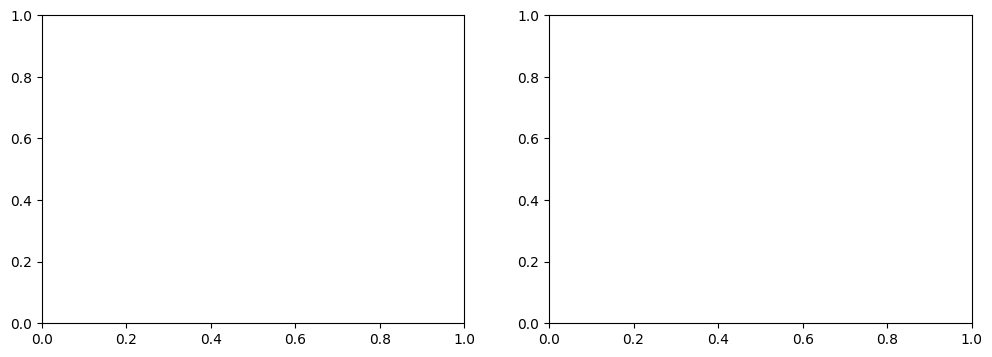

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

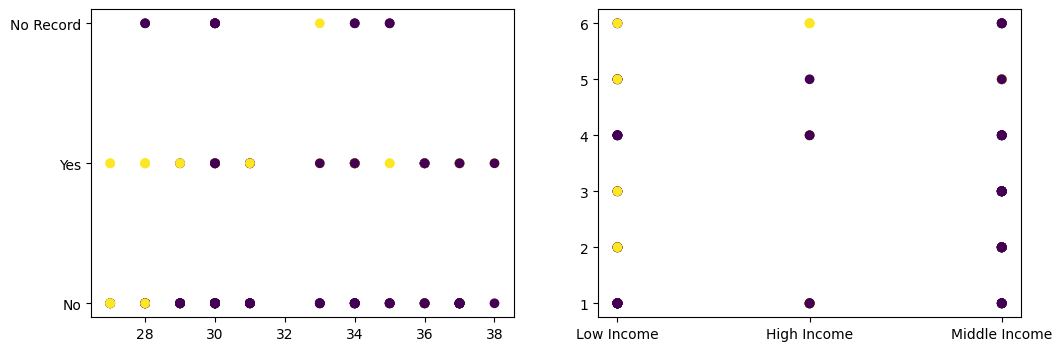

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

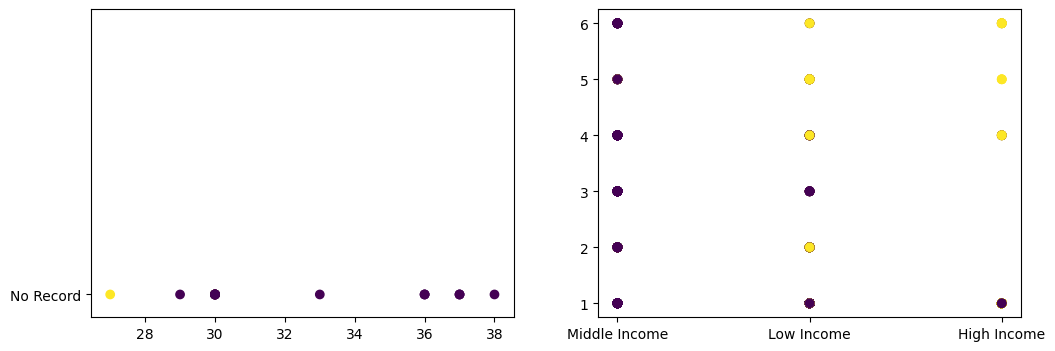

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
